In [69]:
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable)
import socket
print(socket.gethostname())
import os
os.chdir("/home/icb/alioguz.can/projects/campa_pt")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/icb/alioguz.can/miniconda3/envs/campa_pt/bin/python
gpusrv46.scidom.de


In [70]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""
# TF_ENABLE_ONEDNN_OPTS=0

In [71]:
from campa.tl import (
    Cluster,
    # Estimator,
    TorchEstimator,
    # Predictor,
    TorchPredictor,
    # Experiment,
    TorchExperiment,
    ModelComparator,
    # run_experiments,
    run_torch_experiments
)

In [72]:
from campa.data import MPPData
from campa.utils import init_logging
from campa.constants import campa_config

In [73]:
from pathlib import Path
# init logging with level INFO=20, WARNING=30
init_logging(level=30)
# read correct campa_config -- created with setup.ipynb
CAMPA_DIR = Path.cwd()
campa_config.config_fname = CAMPA_DIR / "notebooks/params/campa.ini"
print(campa_config)

Reading config from /ictstr01/home/icb/alioguz.can/projects/campa_pt/notebooks/params/campa.ini
CAMPAConfig (fname: /ictstr01/home/icb/alioguz.can/projects/campa_pt/notebooks/params/campa.ini)
EXPERIMENT_DIR: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments
BASE_DATA_DIR: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_data
CO_OCC_CHUNK_SIZE: 10000000.0
data_config/exampledata: /home/icb/alioguz.can/projects/campa_pt/notebooks/params/ExampleData_constants.py



In [74]:
# import tensorflow as tf
# from tensorflow.keras import backend as K
# import torch
# torch.cuda.empty_cache()
# # Clear the current session
# K.clear_session()

# # Optionally, reset the default graph
# tf.compat.v1.reset_default_graph()

TF

In [7]:
# # get Experiments from config
# exps = Experiment.get_experiments_from_config("notebooks/params/example_experiment_params.py")
# run_experiments(exps, mode="trainval")

In [8]:
# exp = exps[1]
# print("Experiment name:", exp.name)
# print("Experiment is stored in:", exp.full_path)

In [9]:
# print(Estimator(exps[0]).model.summary)

In [10]:
# est = Estimator(exps[1])
# _ = est.train_model()
# pred_torch = Predictor(exps[1])
# pred_torch.evaluate_model()
# cl = Cluster.from_exp_split(exps[1])
# cl.create_clustering()

Torch

In [56]:
torch_exps = TorchExperiment.get_experiments_from_config("notebooks/params/example_experiment_params_torch.py")
print("Experiment name:", torch_exps[0].name)
print("Experiment is stored in:", torch_exps[0].full_path)

Experiment name: VAE
Experiment is stored in: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE


In [57]:
est_torch = TorchEstimator(torch_exps[1])
print(est_torch.model)
est_torch.model.total_trainable_params()

Device: cuda
VAEModelTorch(
  (condition_encoder_latent): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (encoder): Sequential(
    (0): Conv2d(44, 32, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=288, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=16, bias=True)
    (6): ReLU()
  )
  (latent): Linear(in_features=16, out_features=32, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=26, out_features=34, bias=True)
  )
)
12898


In [16]:
# est_torch.train_model()
# pred_torch = TorchPredictor(torch_exps[1])
# pred_torch.evaluate_model()
# results_folder = os.path.join(pred_torch.exp.full_path, f"results_epoch{pred_torch.est.epoch:03d}")
# print("Results folder", results_folder)
# print(os.listdir(results_folder))

Epochs: 100%|██████████| 10/10 [00:39<00:00,  3.98s/it]


{'epoch': 9,
 'loss': 1862.8246765136719,
 'val_loss': 1493.5906982421875,
 'val_decoder_metric': 0.11914214491844177,
 'val_latent_metric': 8.062597274780273,
 'val_decoder_loss': 1485.528076171875,
 'val_latent_loss': 8.062597274780273,
 'decoder_loss': 1856.6697692871094,
 'latent_loss': 6.15488862991333,
 'decoder_metrics': 0.14678890258073807,
 'latent_metrics': 6.15488862991333}

In [12]:
# cl = Cluster.from_exp_split(torch_exps[0])
# print(cl.config["leiden_resolution"])
# cl.create_clustering()

In [106]:
torch_exps = TorchExperiment.get_experiments_from_config("notebooks/params/example_experiment_params_torch.py")

In [ ]:
run_torch_experiments(torch_exps, mode="trainval")

Running experiment for ['VAE', 'CondVAE_pert-CC', 'MPPleiden'] with mode trainval
Training model for VAE
Device: cuda


Epochs:   5%|▌         | 1/20 [00:02<00:42,  2.24s/it]

In [ ]:
# get saved experiments from dir
exps = TorchExperiment.get_experiments_from_dir("torch_test")
comp = ModelComparator(exps)

Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val_imgs/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE/results_epoch000/val_imgs/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/MPPleiden/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/MPPleiden/results_epoch000/val_imgs/clustering.npy


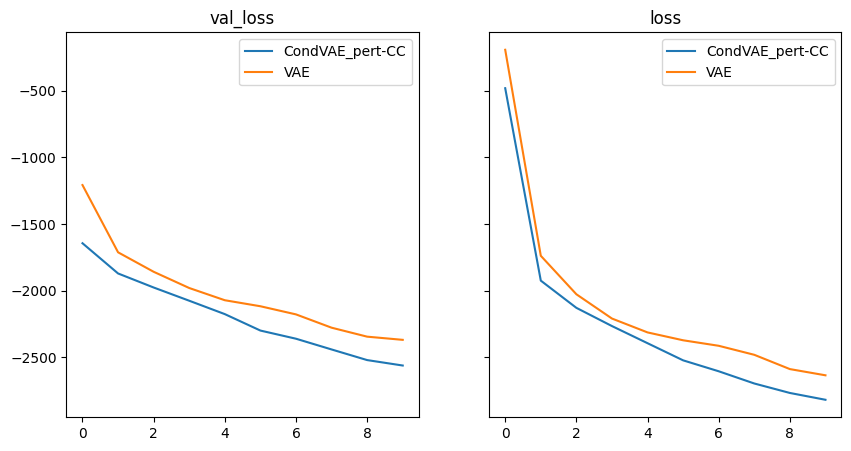

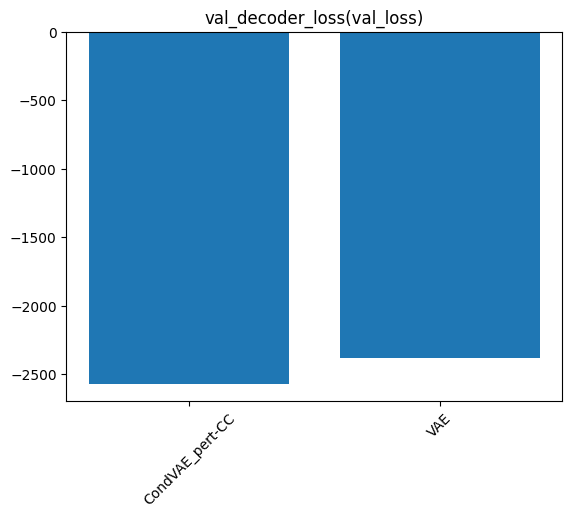

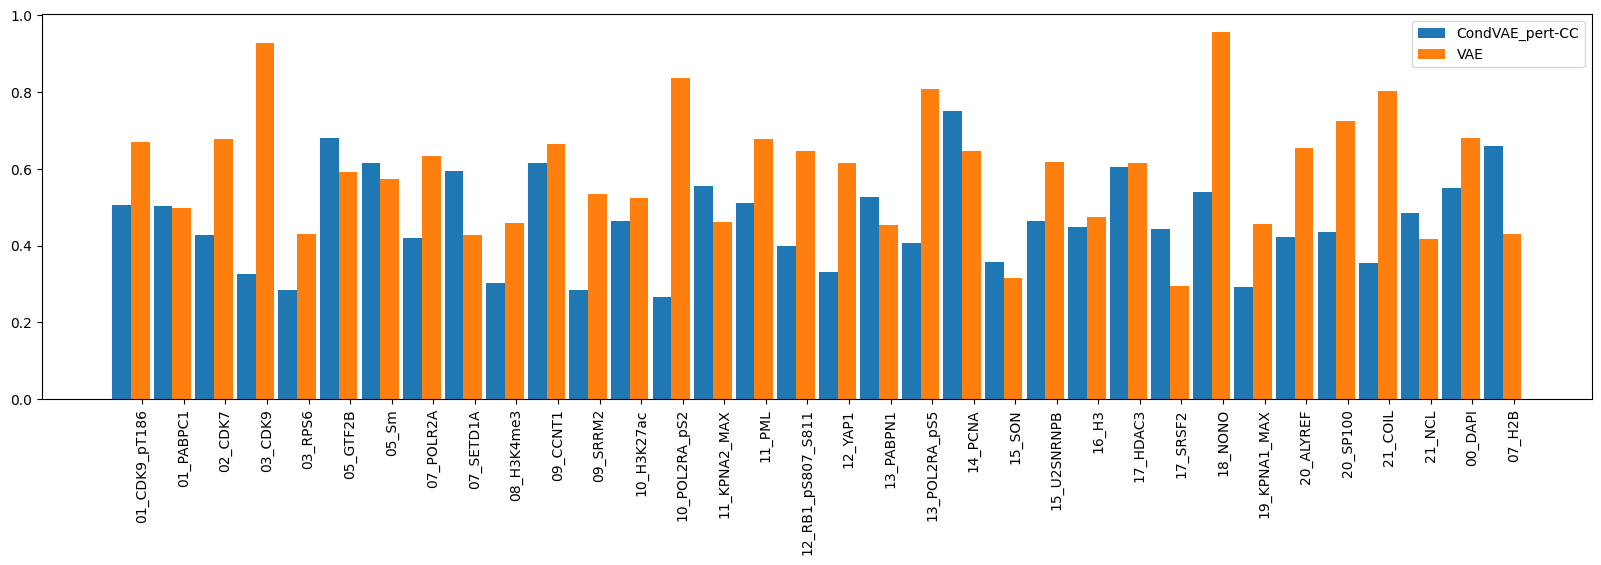

In [ ]:
comp.plot_history(values=["val_loss", "loss"])
comp.plot_final_score(score="val_decoder_loss", fallback_score="val_loss", save_prefix="decoder_loss_")
comp.plot_per_channel_mse()

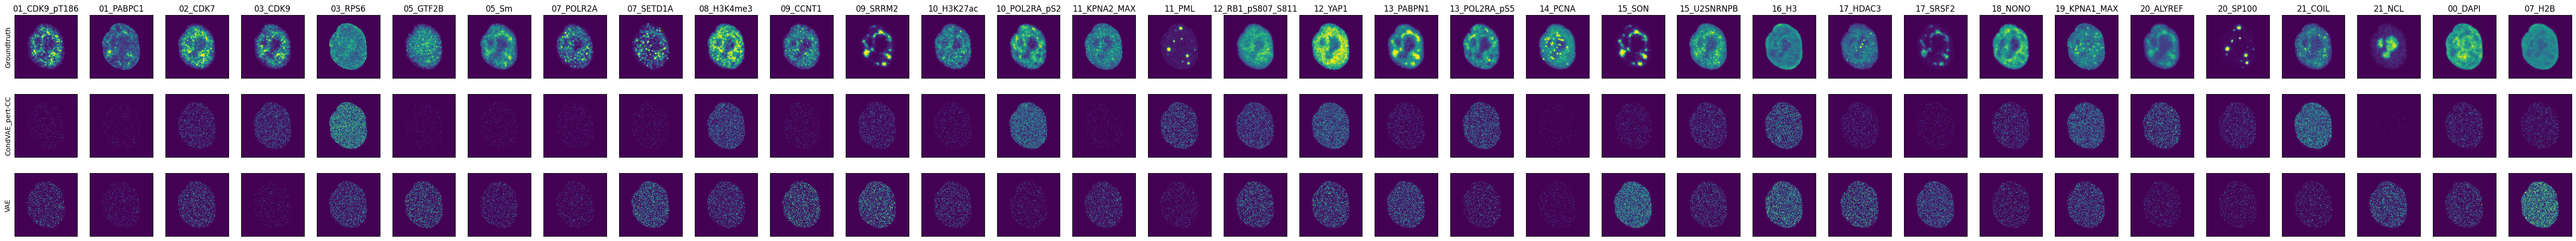

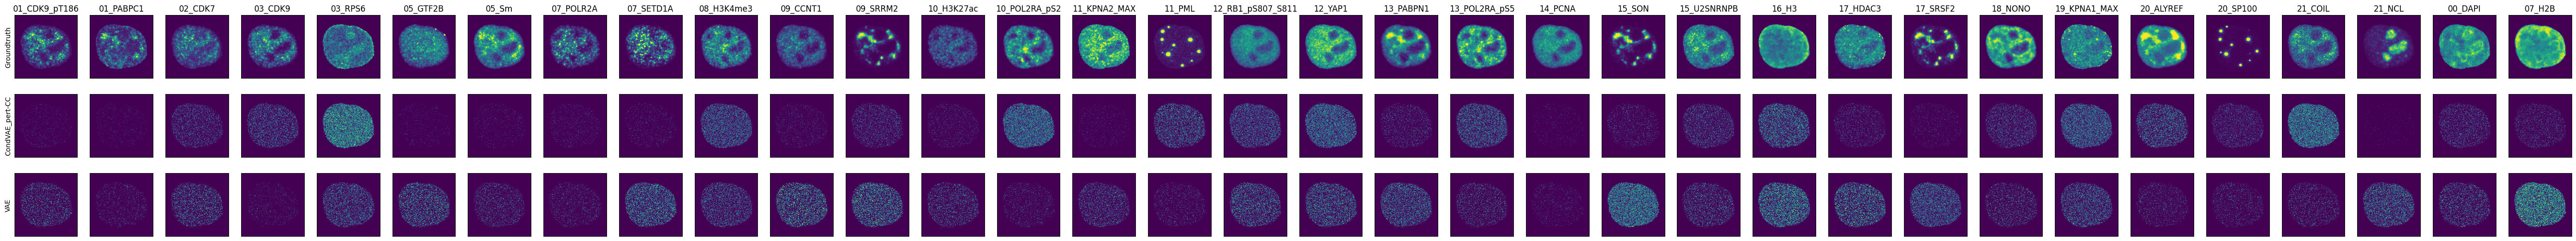

In [ ]:
comp.plot_predicted_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
)

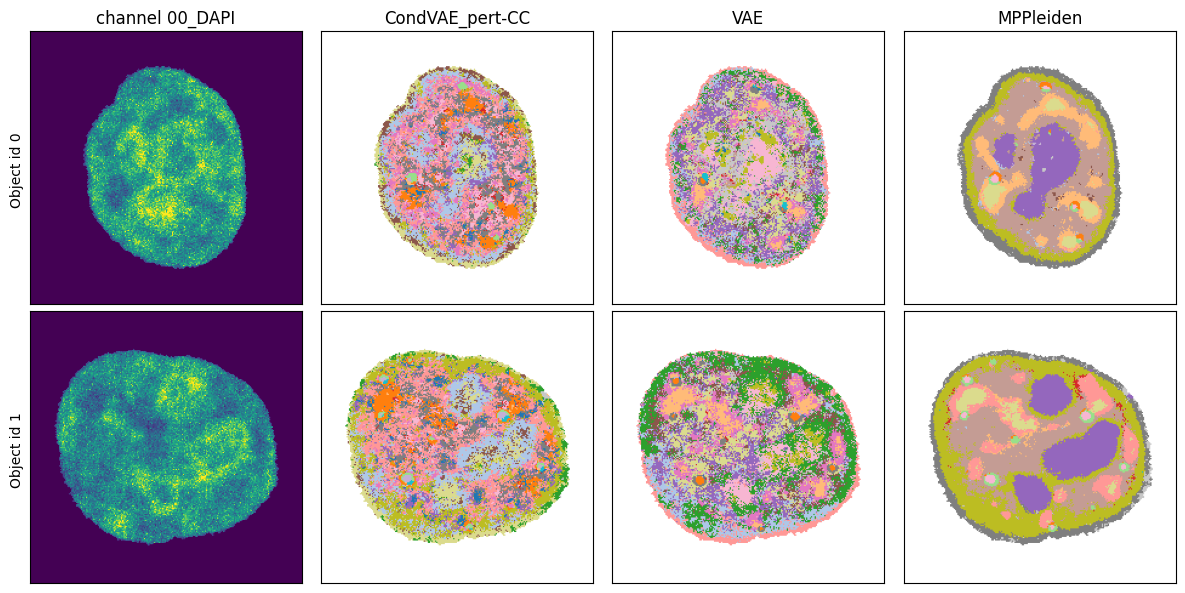

In [ ]:
comp.plot_cluster_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
    img_channel="00_DAPI",
)

In [21]:
mpp_data = MPPData.from_data_dir("/home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val_imgs", data_config="ExampleData", optional_keys=["decoder", "latent"])
print(mpp_data)
print("latent: ",mpp_data.data("latent").shape)
print("decoder: ",mpp_data.data("decoder").shape)

MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['obj_ids', 'x', 'y', 'mpp', 'decoder', 'latent'].
latent:  (40812, 16)
decoder:  (40812, 34)
